In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
home_credit_data = pd.read_csv('home_credit_data.csv')
cleandata = pd.read_csv('cleandata.csv')

In [3]:
home_credit_data.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,AMT_CREDIT_SUM_DEBT,MEAN_DAYS_APPLY,MAX_DAYS_APPLY,NUM_ACTIVE_LOANS,TARGET,SK_ID_CURR
0,0,0,1,0,202500.0,24700.5,351000.0,0.018801,-637.0,-3648.0,...,2.007889,0.121978,0.060749,-0.067329,245781.0,-874.00,-103.0,2.0,1,100002
1,0,0,0,0,270000.0,35698.5,1129500.0,0.003541,-1188.0,-1186.0,...,4.790750,0.132217,0.027598,-0.070862,0.0,-1400.75,-606.0,1.0,0,100003
2,1,1,1,0,67500.0,6750.0,135000.0,0.010032,-225.0,-4260.0,...,2.000000,0.100000,0.050000,-0.011814,0.0,-867.00,-408.0,0.0,0,100004
3,0,0,1,0,135000.0,29686.5,297000.0,0.008019,-3039.0,-9833.0,...,2.316167,0.219900,0.094941,-0.159905,0.0,0.00,0.0,0.0,0,100006
4,0,0,1,0,121500.0,21865.5,513000.0,0.028663,-3038.0,-4311.0,...,4.222222,0.179963,0.042623,-0.152418,0.0,-1149.00,-1149.0,0.0,0,100007


In [4]:
cleandata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def svm(dataset):
    y = dataset['TARGET']
    X = dataset.drop(columns = ['TARGET', 'SK_ID_CURR'])
    
    scalar = MinMaxScaler()
    scalar.fit_transform(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    linear_svc = LinearSVC()
    model = CalibratedClassifierCV(linear_svc,
                                        method='sigmoid', 
                                        cv=3) 
    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)
    print("SVM Model Accuracy Score :" ,model.score(X_test,y_test))
    print("\n")

    
    precision, recall, thresholds = precision_recall_curve(y_test, predict[:,1])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print("Precision : " ,precision)
    print("Recall    : " ,recall)
    print("f1_score  : " ,fscore)
    
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show()
    
    print("\n")
    
    false_pos, true_pos, threshold = roc_curve(y_test, predict[:,1])
    roc_auc = auc(false_pos, true_pos)
    
    plt.title('ROC Curve')
    plt.plot(false_pos, true_pos, 'green', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='best')
    plt.plot([0,1],[0,1])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print("SVM Model ROC Score : ", roc_auc)
    

SVM Model on home_credit_data
SVM Model Accuracy Score : 0.9195648992732062


Precision :  [0.08043602 0.08042106 0.08042237 ... 0.         0.         1.        ]
Recall    :  [1.         0.99979773 0.99979773 ... 0.         0.         0.        ]
f1_score  :  [0.14889548 0.14886761 0.14886985 ...        nan        nan 0.        ]


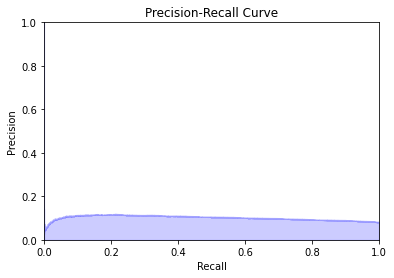

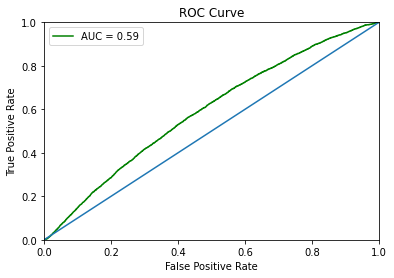

SVM Model ROC Score :  0.5891095351298821


In [6]:
print("SVM Model on home_credit_data")
svm(home_credit_data)

SVM Model on clean_data
SVM Model Accuracy Score : 0.9202965708989805


Precision :  [0.07972158 0.07970661 0.07970791 ... 0.         0.         1.        ]
Recall    :  [1.       0.999796 0.999796 ... 0.       0.       0.      ]
f1_score  :  [0.14767062 0.14764272 0.14764494 ...        nan        nan 0.        ]


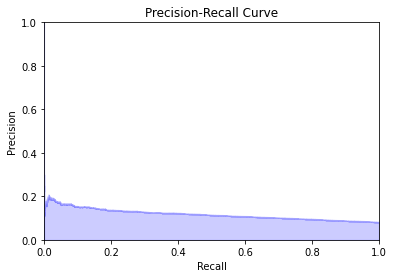

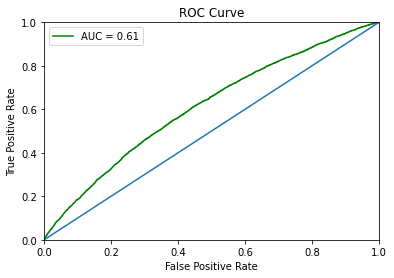

SVM Model ROC Score :  0.6114893520031359


In [7]:
print("SVM Model on clean_data")
svm(cleandata)